<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(2_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.4_n250.csv',
 'data_multi_delta_2.4_n120.csv',
 'data_multi_delta_2.4_n60.csv',
 'data_multi_delta_2.4_n30.csv',
 'data_multi_delta_2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,40.159457,-235.465405,-185.305948,49.433506,-234.739454
1,0.0,1.0,38.173785,25.075845,73.249630,47.255667,25.993963
2,0.0,2.0,55.061304,109.726600,174.787904,65.777507,109.010398
3,0.0,3.0,61.332675,-25.214541,46.118134,72.655801,-26.537667
4,0.0,4.0,56.592077,122.633214,189.225291,67.456422,121.768869
...,...,...,...,...,...,...,...
249995,999.0,245.0,67.354332,52.967884,130.322216,88.603175,41.719041
249996,999.0,246.0,43.518030,-73.068260,-19.550230,46.262186,-65.812417
249997,999.0,247.0,96.973681,-32.972923,74.000758,141.216727,-67.215969
249998,999.0,248.0,38.842054,-44.124850,4.717204,37.956140,-33.238936


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,40.159457,-235.465405,-185.305948,49.433506,-234.739454
1,0.0,1.0,38.173785,25.075845,73.249630,47.255667,25.993963
2,0.0,2.0,55.061304,109.726600,174.787904,65.777507,109.010398
3,0.0,3.0,61.332675,-25.214541,46.118134,72.655801,-26.537667
4,0.0,4.0,56.592077,122.633214,189.225291,67.456422,121.768869
...,...,...,...,...,...,...,...
249995,999.0,245.0,67.354332,52.967884,130.322216,88.603175,41.719041
249996,999.0,246.0,43.518030,-73.068260,-19.550230,46.262186,-65.812417
249997,999.0,247.0,96.973681,-32.972923,74.000758,141.216727,-67.215969
249998,999.0,248.0,38.842054,-44.124850,4.717204,37.956140,-33.238936


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    40.159457 -235.465405 -185.305948   49.433506 -234.739454
      1.0    38.173785   25.075845   73.249630   47.255667   25.993963
      2.0    55.061304  109.726600  174.787904   65.777507  109.010398
      3.0    61.332675  -25.214541   46.118134   72.655801  -26.537667
      4.0    56.592077  122.633214  189.225291   67.456422  121.768869
...                ...         ...         ...         ...         ...
999.0 245.0  67.354332   52.967884  130.322216   88.603175   41.719041
      246.0  43.518030  -73.068260  -19.550230   46.262186  -65.812417
      247.0  96.973681  -32.972923   74.000758  141.216727  -67.215969
      248.0  38.842054  -44.124850    4.717204   37.956140  -33.238936
      249.0  73.089380  183.238492  266.327872   98.790477  167.537395

[250000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    40.159457 -235.465405 -185.305948   49.433506 -234.739454
      1.0    38.173785   25.075845   73.249630   47.255667   25.993963
      2.0    55.061304  109.726600  174.787904   65.777507  109.010398
      3.0    61.332675  -25.214541   46.118134   72.655801  -26.537667
      4.0    56.592077  122.633214  189.225291   67.456422  121.768869
...                ...         ...         ...         ...         ...
999.0 245.0  67.354332   52.967884  130.322216   88.603175   41.719041
      246.0  43.518030  -73.068260  -19.550230   46.262186  -65.812417
      247.0  96.973681  -32.972923   74.000758  141.216727  -67.215969
      248.0  38.842054  -44.124850    4.717204   37.956140  -33.238936
      249.0  73.089380  183.238492  266.327872   98.790477  167.537395

[250000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,40.159457,-235.465405,-185.305948,49.433506,-234.739454
1,0.0,1.0,38.173785,25.075845,73.249630,47.255667,25.993963
2,0.0,2.0,55.061304,109.726600,174.787904,65.777507,109.010398
3,0.0,3.0,61.332675,-25.214541,46.118134,72.655801,-26.537667
4,0.0,4.0,56.592077,122.633214,189.225291,67.456422,121.768869
...,...,...,...,...,...,...,...
249995,999.0,245.0,67.354332,52.967884,130.322216,88.603175,41.719041
249996,999.0,246.0,43.518030,-73.068260,-19.550230,46.262186,-65.812417
249997,999.0,247.0,96.973681,-32.972923,74.000758,141.216727,-67.215969
249998,999.0,248.0,38.842054,-44.124850,4.717204,37.956140,-33.238936


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    40.159457 -235.465405 -185.305948   49.433506 -234.739454
      1.0    38.173785   25.075845   73.249630   47.255667   25.993963
      2.0    55.061304  109.726600  174.787904   65.777507  109.010398
      3.0    61.332675  -25.214541   46.118134   72.655801  -26.537667
      4.0    56.592077  122.633214  189.225291   67.456422  121.768869
...                ...         ...         ...         ...         ...
999.0 245.0  67.354332   52.967884  130.322216   88.603175   41.719041
      246.0  43.518030  -73.068260  -19.550230   46.262186  -65.812417
      247.0  96.973681  -32.972923   74.000758  141.216727  -67.215969
      248.0  38.842054  -44.124850    4.717204   37.956140  -33.238936
      249.0  73.089380  183.238492  266.327872   98.790477  167.537395

[250000 rows x 5 columns]

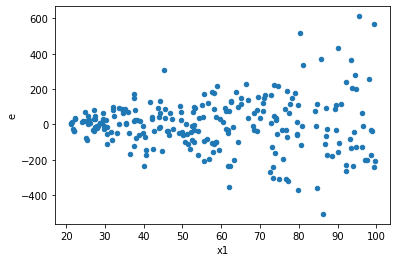

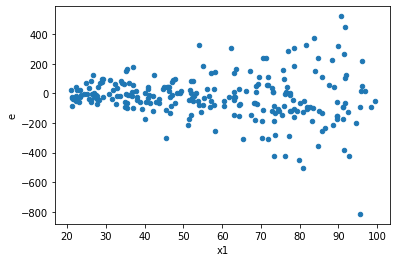

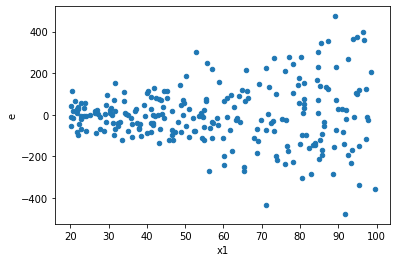

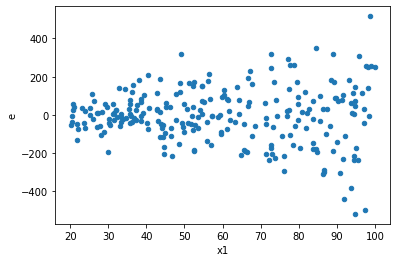

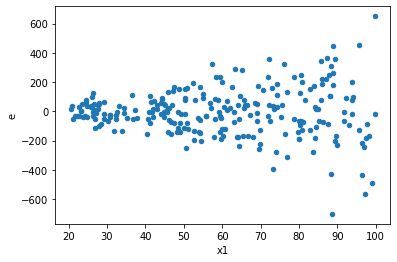

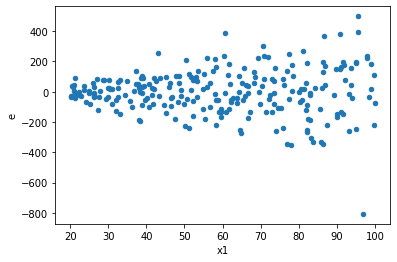

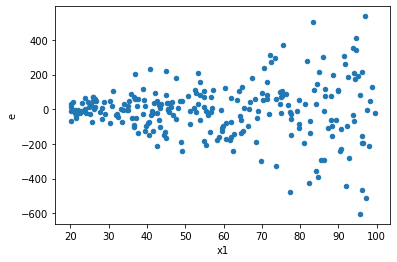

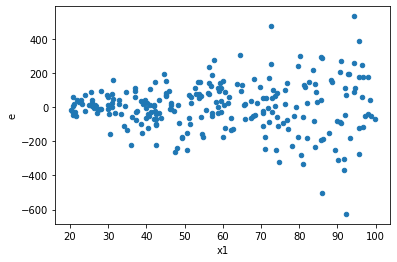

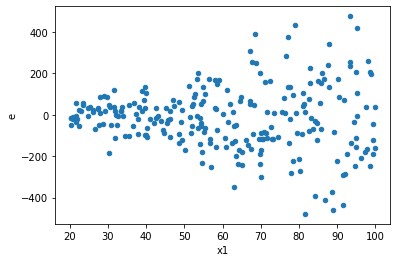

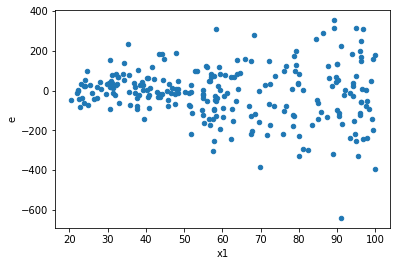

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,99.0,99.0,587846.8682406386,4165177.482081189,5937.847153945845,42072.49981900191,7.085480432254593,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
1.0,99.0,99.0,519769.1031149353,4362993.343188599,5250.192960756922,44070.639830187865,8.394099066376826,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
2.0,99.0,99.0,439243.1442762023,3775152.6993444655,4436.799437133357,38132.85554893399,8.594676430443261,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
3.0,99.0,99.0,783466.0740326642,3839685.515871355,7913.798727602669,38784.70218051873,4.900895703253222,5.3290705182007514e-14,0.9999999999999734,2.6645352591003757e-14,Reject001=0 : Heteroscedasticity
4.0,99.0,99.0,606659.2904616578,4979577.173551869,6127.871620824826,50298.75932880675,8.208194042099795,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
5.0,99.0,99.0,689944.4861793193,3888946.6209700443,6969.136224033528,39282.289100707516,5.63660801538646,4.440892098500626e-16,0.9999999999999998,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,99.0,99.0,574136.1372722934,4911487.3184621,5799.3549219423585,49610.98301476869,8.554569203388684,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
7.0,99.0,99.0,723861.3764684531,3817758.462190539,7311.73107543892,38563.216789803424,5.274156884590902,4.440892098500626e-15,0.9999999999999978,2.220446049250313e-15,Reject001=0 : Heteroscedasticity
8.0,99.0,99.0,518147.0697436187,4132345.854084037,5233.808785289078,41740.86721297007,7.975237331996761,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,99.0,99.0,587846.8682406386,4165177.482081189,5937.847153945845,42072.49981900191,7.085480432254593,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,99.0,99.0,519769.1031149353,4362993.343188599,5250.192960756922,44070.639830187865,8.394099066376826,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,99.0,99.0,439243.1442762023,3775152.6993444655,4436.799437133357,38132.85554893399,8.594676430443261,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,99.0,99.0,783466.0740326642,3839685.515871355,7913.798727602669,38784.70218051873,4.900895703253222,5.3290705182007514e-14,Reject001=0 : Heteroscedasticity
4.0,99.0,99.0,606659.2904616578,4979577.173551869,6127.871620824826,50298.75932880675,8.208194042099795,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,99.0,99.0,689944.4861793193,3888946.6209700443,6969.136224033528,39282.289100707516,5.63660801538646,4.440892098500626e-16,Reject001=0 : Heteroscedasticity
6.0,99.0,99.0,574136.1372722934,4911487.3184621,5799.3549219423585,49610.98301476869,8.554569203388684,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,99.0,99.0,723861.3764684531,3817758.462190539,7311.73107543892,38563.216789803424,5.274156884590902,4.440892098500626e-15,Reject001=0 : Heteroscedasticity
8.0,99.0,99.0,518147.0697436187,4132345.854084037,5233.808785289078,41740.86721297007,7.975237331996761,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64